## Week 4 Assignment: Looking at Land Value in LA Chinatown

**Name**: Clara Fuchshuber

This week I will be mapping land value obtained from the LA Assessor's office in Chinatown. Hopefully I'll be able to this for multiple years of Chinatown's history, to see how land values have changed over time and to what degree.

In [3]:
# First importing our libraries
import pandas
import geopandas
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [8]:
# Import data that Dom has transformed into geojson files
assessor_2006_raw = geopandas.read_file("Assessor_Parcels_Data_2006_TRA.geojson")

In [9]:
# Take a look to make sure the data we're exploring is there
assessor_2006_raw.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 142 columns):
 #    Column                       Dtype              
---   ------                       -----              
 0    OBJECTID_1                   float64            
 1    AIN                          object             
 2    APN                          object             
 3    SitusHouse                   object             
 4    SitusFract                   object             
 5    SitusDirec                   object             
 6    SitusUnit                    object             
 7    SitusStree                   object             
 8    SitusAddre                   object             
 9    SitusCity                    object             
 10   SitusZIP                     object             
 11   SitusFullA                   object             
 12   TaxRateAre                   object             
 13   TaxRateCit                   object             
 14 

In [10]:
assessor_2006_raw.head()

OBJECTID_1         AIN           APN SitusHouse SitusFract SitusDirec  \
0   1245695.0  5414007015  5414-007-015        999       None          N   
1   1244222.0  5406028127  5406-028-127        918       None          W   
2   1244952.0  5409016030  5409-016-030        908       None       None   
3   1244337.0  5407007040  5407-007-040        716       None       None   
4   1244506.0  5407022001  5407-022-001        734       None          N   

  SitusUnit    SitusStree              SitusAddre       SitusCity  ...  \
0      None      BROADWAY          999 N BROADWAY  LOS ANGELES CA  ...   
1       317    COLLEGE ST  918 W COLLEGE ST   317  LOS ANGELES CA  ...   
2      None      AVILA ST            908 AVILA ST  LOS ANGELES CA  ...   
3         A  NEW DEPOT ST    716 NEW DEPOT ST   A  LOS ANGELES CA  ...   
4      None       HILL PL           734 N HILL PL  LOS ANGELES CA  ...   

  StreetDirection    StreetName UnitNo            City ZIPcode5  \
0               N      BROADWAY         LOS ANGELES CA  90012.0   
1               W    COLLEGE ST    317  LOS ANGELES CA  90012.0   
2                      AVILA ST         LOS ANGELES CA  90012.0   
3                  NEW DEPOT ST      A  LOS ANGELES CA  90012.0   
4               N       HILL PL         LOS ANGELES CA  90012.0   

            rowID CENTER_LAT_y CENTER_LON_y                    Location 1  \
0  20065414007015    34.066669  -118.236365  (34.06666874, -118.23636466)   
1  20065406028127    34.066379  -118.245243  (34.06637901, -118.24524342)   
2  20065409016030    34.057575  -118.232612   (34.0575754, -118.23261206)   
3  20065407007040    34.064930  -118.242581   (34.06492964, -118.2425805)   
4  20065407022001    34.062405  -118.242174  (34.06240475, -118.24217396)   

                                            geometry  
0  POLYGON Z ((-118.23615 34.06662 0.00000, -118....  
1  POLYGON Z ((-118.24515 34.06608 0.00000, -118....  
2  POLYGON Z ((-118.23247 34.05774 0.00000, -118....  
3  POLYGON Z ((-118.24270 34.06474 0.00000, -118....  
4  POLYGON Z ((-118.24245 34.06255 0.00000, -118....  

[5 rows x 142 columns]

In [11]:
# I'll work with this data for the year 2006, then once I'm finished creating the map/visualizations I will loop for the other assessor data years
columns_to_keep = ['TotalValue','geometry','LandValue','YearBuilt']

In [12]:
# Create new dataframe with chosen columns
assessor_2006 = assessor_2006_raw[columns_to_keep]

<AxesSubplot: >

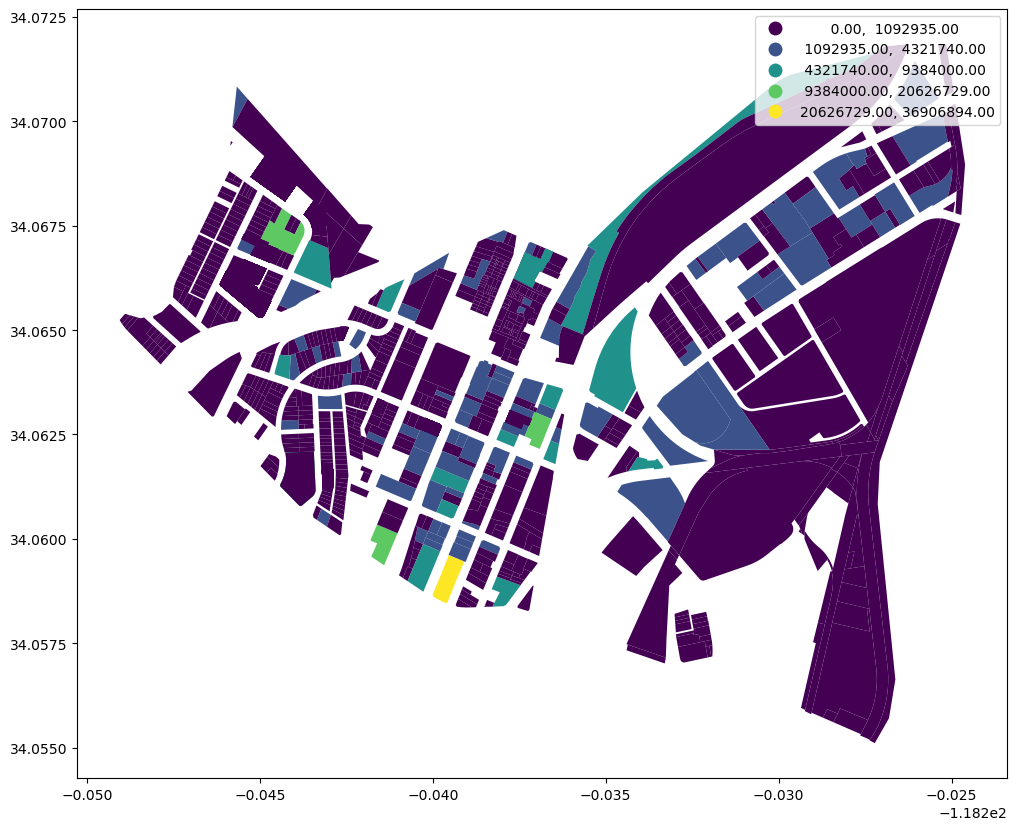

In [13]:
# Map to see what TotalValue data looks like
assessor_2006.plot(figsize=(12,10),
                   column='TotalValue',
                   legend=True,
                   scheme='NaturalBreaks')

<AxesSubplot: >

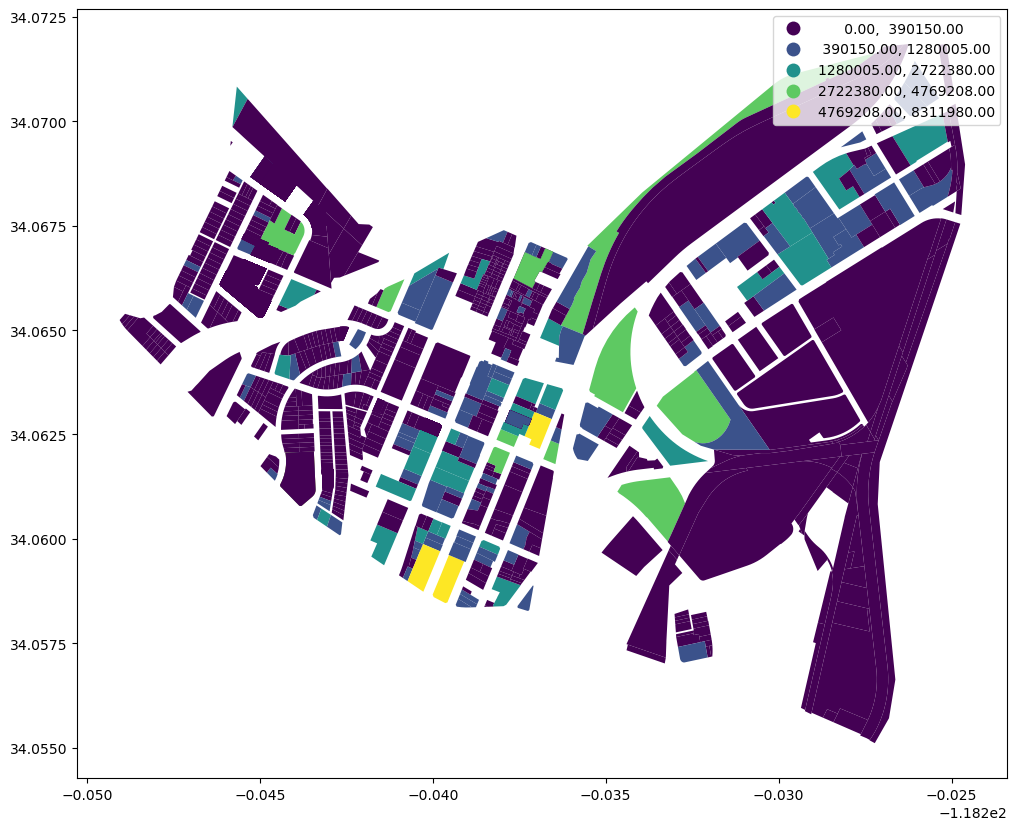

In [14]:
# Map LandValue and see hwo it differs from TotalValue
assessor_2006.plot(figsize=(12,10),
                   column='LandValue',
                   legend=True,
                   scheme='NaturalBreaks')

In [15]:
# Let's look at some statistical values for parcel's TotalValue
assessor_2006.TotalValue.describe()

count    1.095000e+03
mean     5.478814e+05
std      1.727588e+06
min      0.000000e+00
25%      9.457300e+04
50%      1.997560e+05
75%      4.351585e+05
max      3.690689e+07
Name: TotalValue, dtype: float64

## Importing Yearly Data and Creating Maps

Now that I know I can manipulate one year of assessor's data, I'm going to try and import all the other years of data I have (2006-2021). I will then create maps on the TotalValue/LandValue for each of the datasets. I will create a new column on each dataset that assigns the data the year it was collected, then merge all the disparate datasets into one large dataframe. The data from each year will not be lost because of the new column I've added. Then I can create graphs that visualize TotalValue/LandValue as bar charts. 

In [16]:
# Create an array of all years of assessor data using for loop
parcel_dataframes = []

for year in range(2006,2022):
    parcel_data_filepath = "Assessor_Parcels_Data_" + str(year) + "_TRA.geojson"
    parcel_dataframe_raw = geopandas.read_file(parcel_data_filepath)
    parcel_dataframe = parcel_dataframe_raw[columns_to_keep].copy()
    parcel_dataframe['Year'] = year
    parcel_dataframes.append(parcel_dataframe)

print(parcel_dataframes[0].info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TotalValue  1095 non-null   float64 
 1   geometry    1095 non-null   geometry
 2   LandValue   1095 non-null   float64 
 3   YearBuilt   1095 non-null   int64   
 4   Year        1095 non-null   int64   
dtypes: float64(2), geometry(1), int64(2)
memory usage: 42.9 KB
None


In [17]:
# Ensure that the new column we created does track the data by year
print(parcel_dataframes[5].sample(5))

     TotalValue                                           geometry  LandValue  \
827    298000.0  POLYGON Z ((-118.24569 34.06632 0.00000, -118....   159000.0   
318   1327352.0  POLYGON Z ((-118.23971 34.05985 0.00000, -118....  1324090.0   
531         0.0  POLYGON Z ((-118.22720 34.06235 0.00000, -118....        0.0   
463    824755.0  POLYGON Z ((-118.23715 34.06287 0.00000, -118....   410729.0   
357    148650.0  POLYGON Z ((-118.23199 34.05782 0.00000, -118....    69829.0   

     YearBuilt  Year  
827       1976  2011  
318       1980  2011  
531          0  2011  
463       1982  2011  
357       1958  2011  


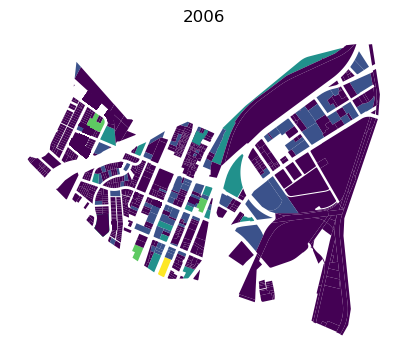

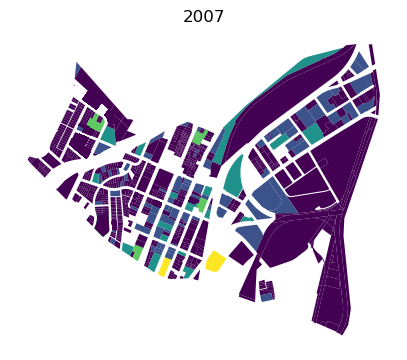

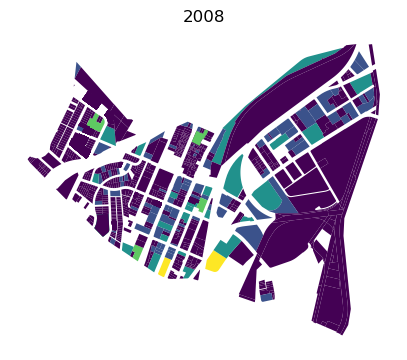

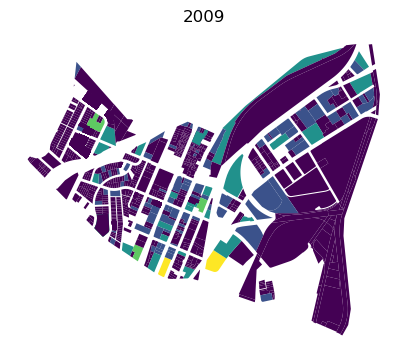

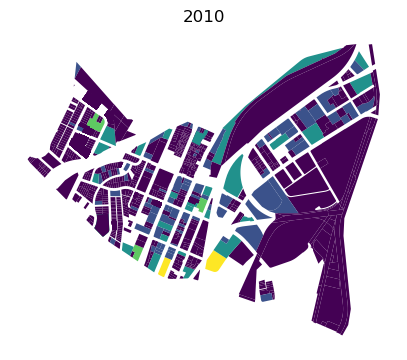

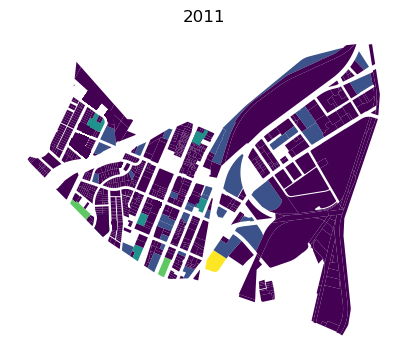

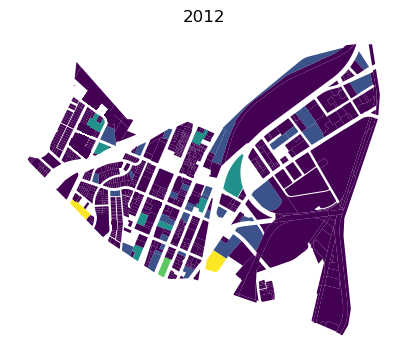

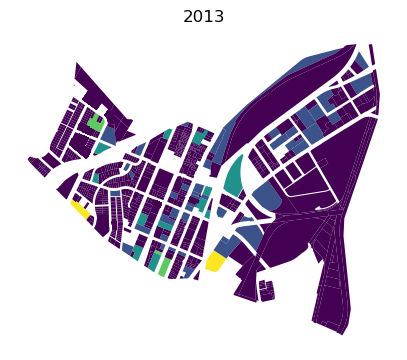

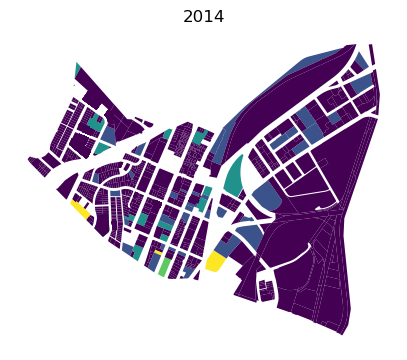

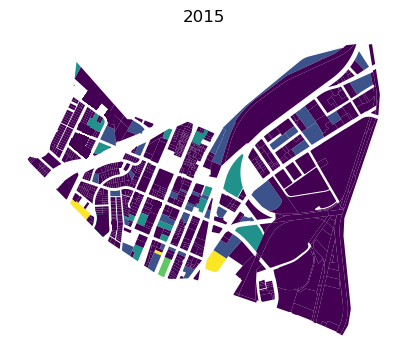

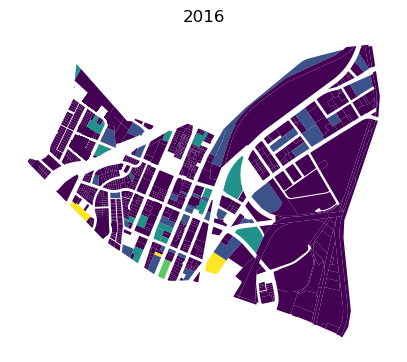

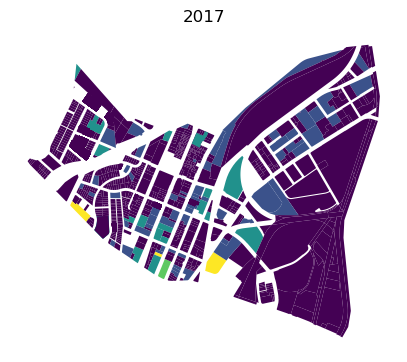

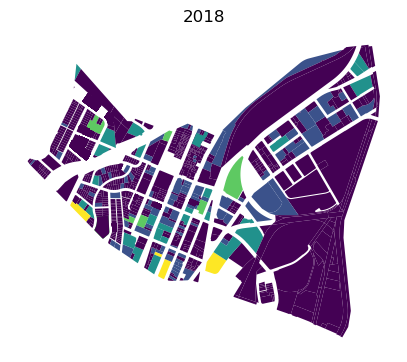

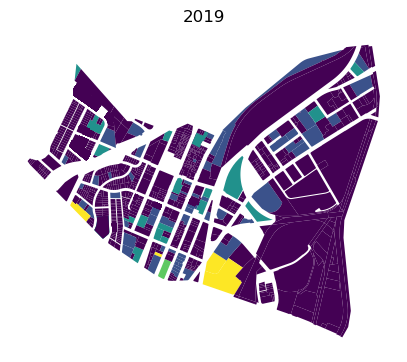

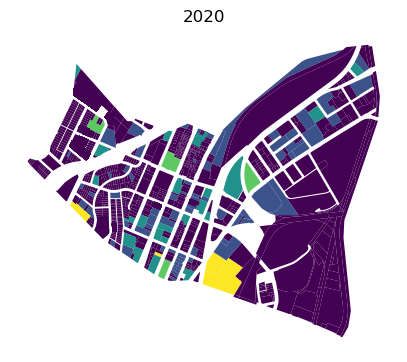

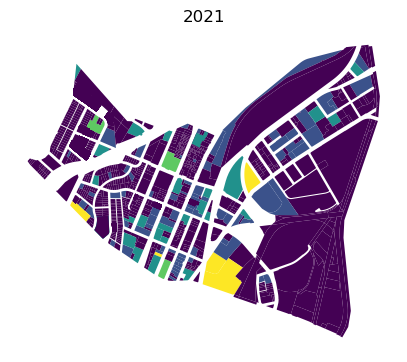

In [18]:
# Now create for loop to print out all maps for Total Value

for parcel_dataframe in parcel_dataframes:
    fig, ax = plt.subplots(figsize=(5,5))
    parcel_dataframe.plot(ax=ax,
                          column='TotalValue',
                          scheme='NaturalBreaks')
    ax.set_title(parcel_dataframe['Year'][0])
    ax.axis('off')
    

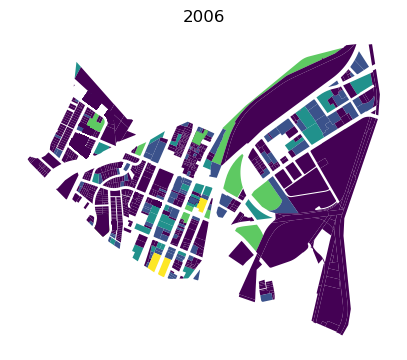

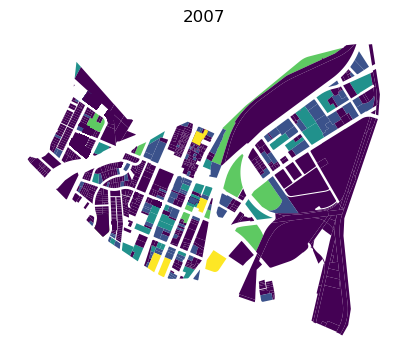

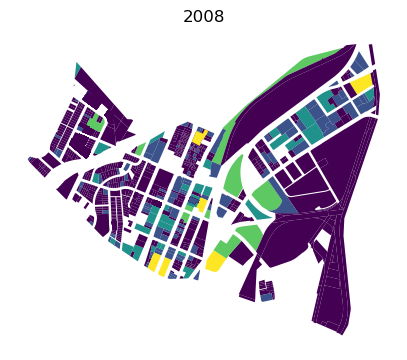

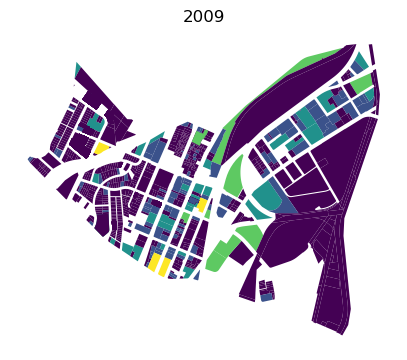

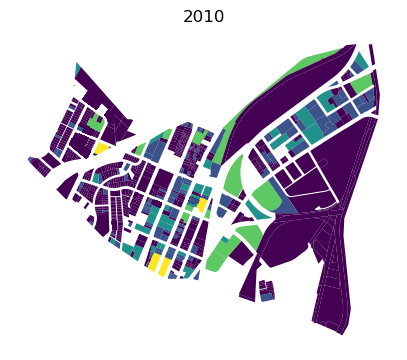

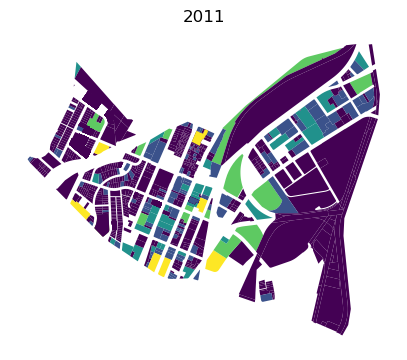

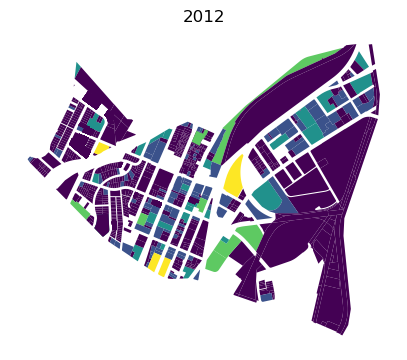

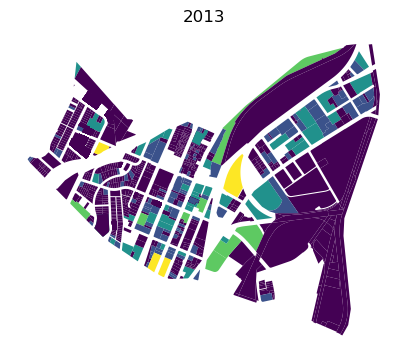

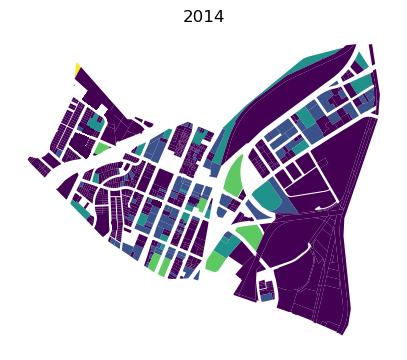

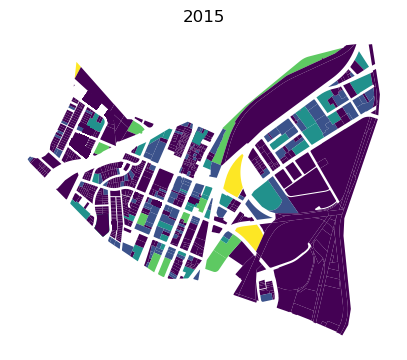

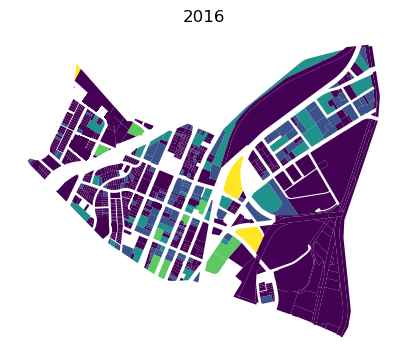

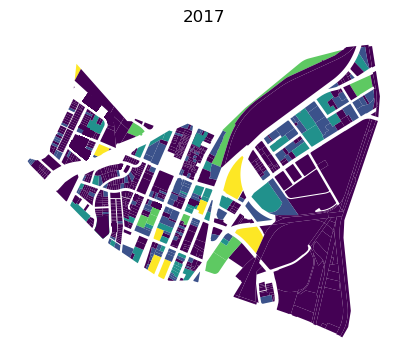

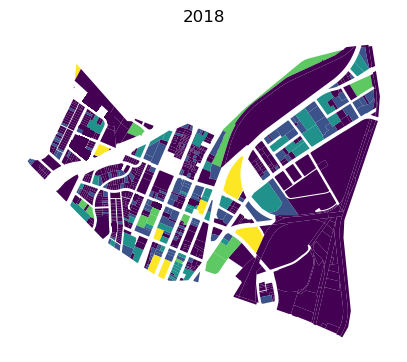

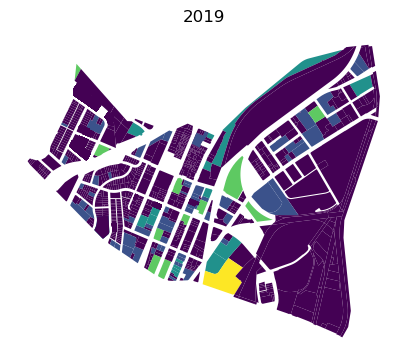

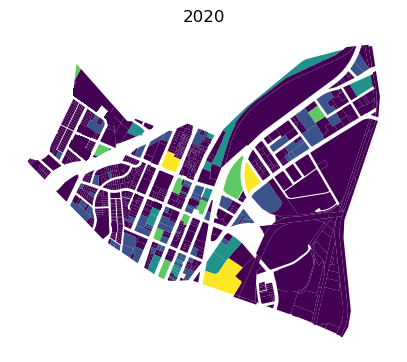

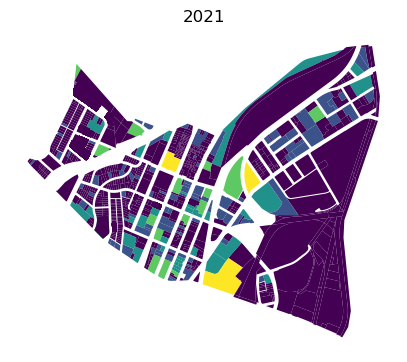

In [19]:
# Plot maps for land value by year

for parcel_dataframe in parcel_dataframes:
    fig, ax = plt.subplots(figsize=(5,5))
    parcel_dataframe.plot(ax=ax,
                          column='LandValue',
                          scheme='NaturalBreaks')
    ax.set_title(parcel_dataframe['Year'][0])
    ax.axis('off')

## Creating a Bar Graph of Total Value over Time

Now that I've mapped both Total Value and Land Value over time, I would like to combine all my disparate datasets into one, and then create a graph to see how total value has changed over time. In order to do this, I think I should create a histogram and make buckets for different levels of total value. 

In [20]:
# Combined all my dataframes into one big one
assessor_parcels_all = pandas.concat(parcel_dataframes)

In [21]:
# Checking to make sure it worked
assessor_parcels_all.sample(5)

TotalValue                                           geometry  LandValue  \
751    811255.0  POLYGON Z ((-118.24288 34.06166 0.00000, -118....   453153.0   
781   1731640.0  POLYGON Z ((-118.23921 34.06255 0.00000, -118....  1726503.0   
614    269938.0  POLYGON Z ((-118.24438 34.06619 0.00000, -118....    41801.0   
736    231853.0  POLYGON Z ((-118.24569 34.06632 0.00000, -118....    93025.0   
955     43563.0  POLYGON Z ((-118.24505 34.06715 0.00000, -118....     5468.0   

     YearBuilt  Year  
751       1966  2021  
781          0  2012  
614       1969  2017  
736       1976  2009  
955       1969  2013

In [22]:
# Now I will break down TotalValue into different buckets
# First, take a look at the range and median values for this column

assessor_parcels_all.TotalValue.describe()

count    1.815400e+04
mean     9.160820e+05
std      3.620106e+06
min      0.000000e+00
25%      1.186308e+05
50%      2.525690e+05
75%      5.949892e+05
max      7.575109e+07
Name: TotalValue, dtype: float64

In [40]:
# Create a function that will sort each totalvalue row item into a new bucket, 0-4
def bucket_total_value(total_value):
    if (total_value < 50000):
        return "Less than 500k"
    if (total_value < 100000):
        return "500k to 999k"
    if (total_value < 250000):
        return "1mil to 2.49mil"
    if (total_value < 400000):
        return "2.5mil to 3.99mil"
    if (total_value < 7600000):
        return "4mil or More"

In [41]:
# Testing to make sure this works
bucket_total_value(3648954)

'4mil or More'

In [42]:
# Create new column totalvaluebracket to capture the function outputs
assessor_parcels_all['TotalValueBracket'] = assessor_parcels_all['TotalValue'].map(bucket_total_value)
assessor_parcels_all['TotalValueBracket'] = assessor_parcels_all['TotalValueBracket'].astype("string")

In [43]:
# Check to make sure it worked
assessor_parcels_all.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18154 entries, 0 to 1205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   TotalValue         18154 non-null  float64 
 1   geometry           18154 non-null  geometry
 2   LandValue          18154 non-null  float64 
 3   YearBuilt          18154 non-null  int64   
 4   Year               18154 non-null  int64   
 5   TotalValueBracket  17789 non-null  string  
dtypes: float64(2), geometry(1), int64(2), string(1)
memory usage: 992.8 KB


In [44]:
assessor_parcels_all.sample(5)

TotalValue                                           geometry  \
828     367588.0  POLYGON Z ((-118.24247 34.06133 0.00000, -118....   
1160    353265.0  POLYGON Z ((-118.24764 34.06477 0.00000, -118....   
229      87793.0  POLYGON Z ((-118.24206 34.06402 0.00000, -118....   
765     299794.0  POLYGON Z ((-118.24527 34.06867 0.00000, -118....   
77      101017.0  POLYGON Z ((-118.23864 34.06566 0.00000, -118....   

      LandValue  YearBuilt  Year  TotalValueBracket  
828    137480.0       1980  2017  2.5mil to 3.99mil  
1160   353265.0          0  2019  2.5mil to 3.99mil  
229     44950.0       1965  2011       500k to 999k  
765     87630.0       2002  2012  2.5mil to 3.99mil  
77      41396.0       1949  2016    1mil to 2.49mil

In [45]:
# Now create a count column for each of the brackets
total_value_grouped = assessor_parcels_all.value_counts(['Year','TotalValueBracket']).reset_index(name='count')
total_value_grouped

Year TotalValueBracket  count
0   2021      4mil or More    536
1   2020      4mil or More    521
2   2019      4mil or More    502
3   2018      4mil or More    441
4   2017      4mil or More    419
..   ...               ...    ...
75  2017      500k to 999k     75
76  2018      500k to 999k     64
77  2019      500k to 999k     55
78  2020      500k to 999k     50
79  2021      500k to 999k     50

[80 rows x 3 columns]

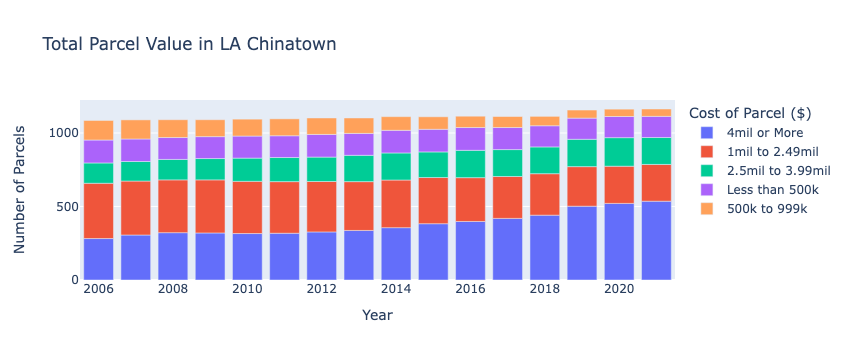

In [46]:
# Plot the counts
fig = px.bar(total_value_grouped,
             x='Year',
             y='count',
             color='TotalValueBracket',
             title='Total Parcel Value in LA Chinatown',
             labels = {
                 'Year':'Year',
                 'count':'Number of Parcels',
                 'TotalValueBracket':'Cost of Parcel ($)'
                    })
fig.show()

In [47]:
# I've tried multiple times to fix the legend, but all my attempts didn't work. I would like to learn how to fix this issue, or maybe see if there is a better way to plot this kind of data

In [48]:
assessor_parcels_all.sample(5)

TotalValue                                           geometry  LandValue  \
502     65015.0  POLYGON Z ((-118.24155 34.06485 0.00000, -118....    53845.0   
233   2910000.0  POLYGON Z ((-118.24033 34.06150 0.00000, -118....  2910000.0   
20    6900220.0  POLYGON Z ((-118.24293 34.06600 0.00000, -118....   385728.0   
96      66819.0  POLYGON Z ((-118.23841 34.06628 0.00000, -118....    28467.0   
830    989330.0  POLYGON Z ((-118.24156 34.06450 0.00000, -118....   212245.0   

     YearBuilt  Year TotalValueBracket  
502       1922  2017      500k to 999k  
233          0  2017      4mil or More  
20        1968  2006      4mil or More  
96        1947  2010      500k to 999k  
830       1974  2014      4mil or More

In [49]:
columns_to_keep = ['TotalValue', 'Year']
total_value_df = assessor_parcels_all[columns_to_keep].copy()
total_value_df.sample(5)

TotalValue  Year
766     176213.0  2017
1103    137766.0  2019
173     129555.0  2014
271     170361.0  2011
682     707244.0  2019

In [50]:
total_value_avg_df = total_value_df.groupby(['Year'], as_index=False).mean()
total_value_avg_df.info()
total_value_avg_df.sample(16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        16 non-null     int64  
 1   TotalValue  16 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 384.0 bytes


Year    TotalValue
5   2011  7.399112e+05
12  2018  1.109179e+06
7   2013  8.336502e+05
4   2010  6.852306e+05
0   2006  5.478814e+05
10  2016  9.886011e+05
8   2014  9.022980e+05
13  2019  1.242547e+06
11  2017  1.042144e+06
1   2007  6.279601e+05
2   2008  6.594122e+05
3   2009  6.808104e+05
9   2015  9.565077e+05
14  2020  1.329677e+06
6   2012  7.785265e+05
15  2021  1.409407e+06

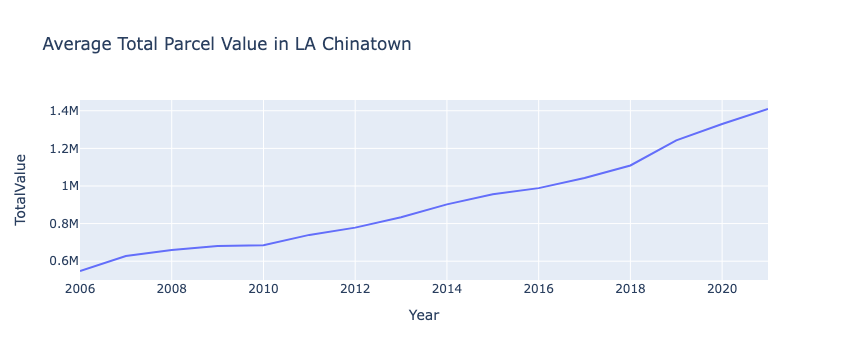

In [51]:
fig = px.line(total_value_avg_df, x='Year', y='TotalValue', 
              title='Average Total Parcel Value in LA Chinatown')
fig.show()              

In [52]:
avg_rent_full_df = pandas.read_excel('Costar_Rent_DataTable.xlsx')
avg_rent_full_df.sample(5)

Period   Asset Value  Vacancy Rate  Market Asking Rent/Unit  \
18   2011  1.275481e+10      0.059031              2289.662075   
3    2025  2.500918e+10      0.086277              2864.833666   
16   2013  1.371834e+10      0.049494              2374.682665   
25   2004  9.055684e+09      0.084493              2018.945739   
2    2026  2.559552e+10      0.085275              2927.078982   

   Annual Rent Growth  Inventory Units Under Constr Units  \
18            0.01084            19071               1032   
3            0.021095            41605                  -   
16           0.015659            19739               3887   
25            0.03514            14998                392   
2            0.021727            42433                  -   

   Under Constr % of Inventory  12 Mo Absorp Units  Market Sale Price/Unit  \
18                    0.054114               240.0           306967.567997   
3                            -              1426.0           601891.242499   
16                     0.19692               465.0           330156.730735   
25                    0.026137               893.0           217941.430836   
2                            -               799.0           616002.439949   

   12 Mo Sales Vol 12 Mo Sales Vol Growth  Market Cap Rate  
18       268464440               0.229042         0.046073  
3                -                      -         0.036804  
16       117978000              -0.397825         0.045761  
25        55439245                0.88351         0.052542  
2                -                      -         0.036804

In [53]:
rent_renamed = avg_rent_full_df.rename(columns={'Period':'Year', 'Market Asking Rent/Unit':'Avg_Rent'})

In [54]:
columns_to_keep = ['Year', 'Avg_Rent']
avg_rent_df = rent_renamed[columns_to_keep].copy()
avg_rent_df.info

<bound method DataFrame.info of         Year     Avg_Rent
0       2028  3012.268051
1       2027  2982.954905
2       2026  2927.078982
3       2025  2864.833666
4       2024  2805.649839
5   2023 EST  2759.149072
6   2023 YTD  2736.519999
7       2022  2747.348307
8       2021  2759.793987
9       2020  2484.859009
10      2019  2668.183603
11      2018  2672.985301
12      2017  2609.732017
13      2016  2574.607381
14      2015  2519.445898
15      2014  2432.144676
16      2013  2374.682665
17      2012  2338.071530
18      2011  2289.662075
19      2010  2265.107424
20      2009  2339.284357
21      2008  2423.571024
22      2007  2294.623235
23      2006  2235.254036
24      2005  2091.513096
25      2004  2018.945739
26      2003  1950.408213
27      2002  1959.383754
28      2001  1901.141211
29      2000  1805.137832>

In [55]:
avg_rent_final_df = avg_rent_df[(avg_rent_df['Year']<='2021') & (avg_rent_df['Year']>='2006')]
avg_rent_final_df = avg_rent_final_df.astype({'Year':'int'})
avg_rent_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 8 to 23
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      16 non-null     int64  
 1   Avg_Rent  16 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 384.0 bytes


In [56]:
all_avg_data = total_value_avg_df.merge(avg_rent_final_df,on='Year')
all_avg_data.info()
all_avg_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        16 non-null     int64  
 1   TotalValue  16 non-null     float64
 2   Avg_Rent    16 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 512.0 bytes


Year    TotalValue     Avg_Rent
0   2006  5.478814e+05  2235.254036
1   2007  6.279601e+05  2294.623235
2   2008  6.594122e+05  2423.571024
3   2009  6.808104e+05  2339.284357
4   2010  6.852306e+05  2265.107424
5   2011  7.399112e+05  2289.662075
6   2012  7.785265e+05  2338.071530
7   2013  8.336502e+05  2374.682665
8   2014  9.022980e+05  2432.144676
9   2015  9.565077e+05  2519.445898
10  2016  9.886011e+05  2574.607381
11  2017  1.042144e+06  2609.732017
12  2018  1.109179e+06  2672.985301
13  2019  1.242547e+06  2668.183603
14  2020  1.329677e+06  2484.859009
15  2021  1.409407e+06  2759.793987

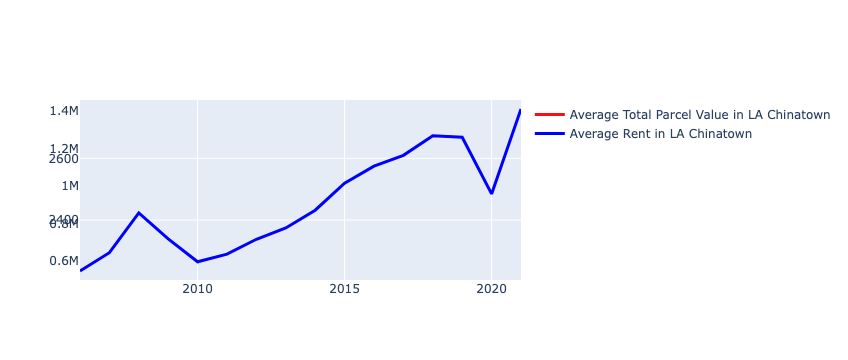

In [57]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=all_avg_data['Year'],
        y=all_avg_data['TotalValue'],
        name='Average Total Parcel Value in LA Chinatown',
        mode='lines',
        line = dict(color='#f70f13', width=3)
    ),
)

fig.add_trace(
    go.Scatter(
        x=all_avg_data['Year'],
        y=all_avg_data['Avg_Rent'],
        name='Average Rent in LA Chinatown',
        mode='lines',
        line = dict(color='#0000ff', width=3),
        yaxis='y2'),
    )

fig.show()

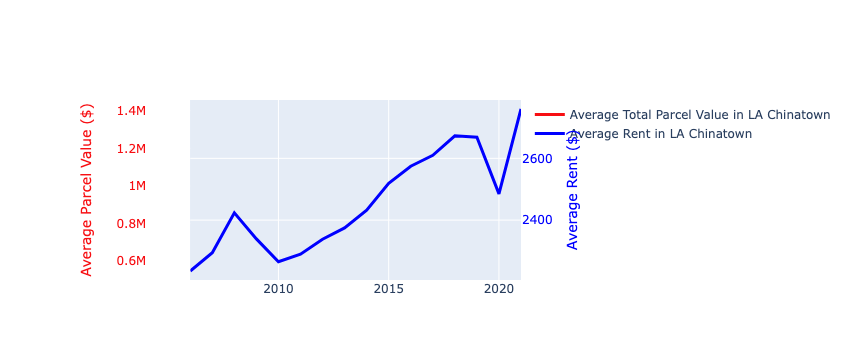

In [58]:
# Create axis objects
fig.update_layout(
      xaxis=dict(
          domain=[0.25, 1]                 #Sets the domain of this axis (in plot fraction). Play with the numbers to see how it affects the plot
      ),
    yaxis=dict(
        title="Average Parcel Value ($)",  #Add axis title for the second y-axis
        titlefont=dict(
            color="#f70f13"              #Make the color of the second y-axis the same as its corresponding line color
        ),
        tickfont=dict(
            color="#f70f13"
        ),
        anchor="free",                   #If set to "free", this axis' position is determined by 'position'.
        overlaying="y",
        side="left",
        position=0.15
    ),
    yaxis2=dict(
        title="Average Rent ($)",   #Add axis title for the second y-axis
        titlefont=dict(
            color="#0000ff"              #Make the color of the third y-axis the same as its corresponding line color
        ),
        tickfont=dict(
            color="#0000ff"
        ),
        anchor="x",                      #If set to "x", this axis is bound to the corresponding opposite-letter axis - in this case, y-axis. And the 'side' parameter specifies which side this y-axis is placed
        overlaying="y",
        side="right"
    ),
    )
    
fig.show()    

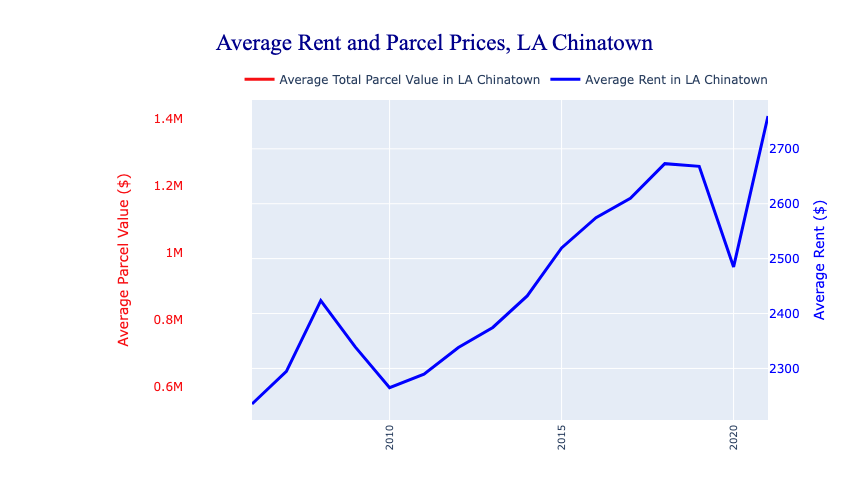

In [59]:
#Fine-tune the chart
fig.update_layout(hoverlabel_bgcolor='#DAEEED',               #Change the background color of the tooltip to light blue
             autosize=False,
             width=700,
             height=500,
             title_text="Average Rent and Parcel Prices, LA Chinatown", #Add a chart title
             title_font_family="Times New Roman",
             title_font_size = 23,
             title_font_color="darkblue",                     #Specify font color of the title
             title_x=0.77,                                    #Specify the title position
             xaxis=dict(
                    tickfont_size=10,
                    tickangle = 270,
                    showgrid = True,
                    zeroline = True,
                    showline = True,
                    showticklabels = True,
                    tickformat="%b\n%Y"
                    ),
             legend = dict(orientation = 'h', xanchor = "center", x = 0.62, y= 1.11), #Adjust legend position
                 )
                 
fig.write_html('multiple_y_axis.html')                       #Export the visualization to html. The html file will be saved automatically in the same folder of your python code file          

fig.show()

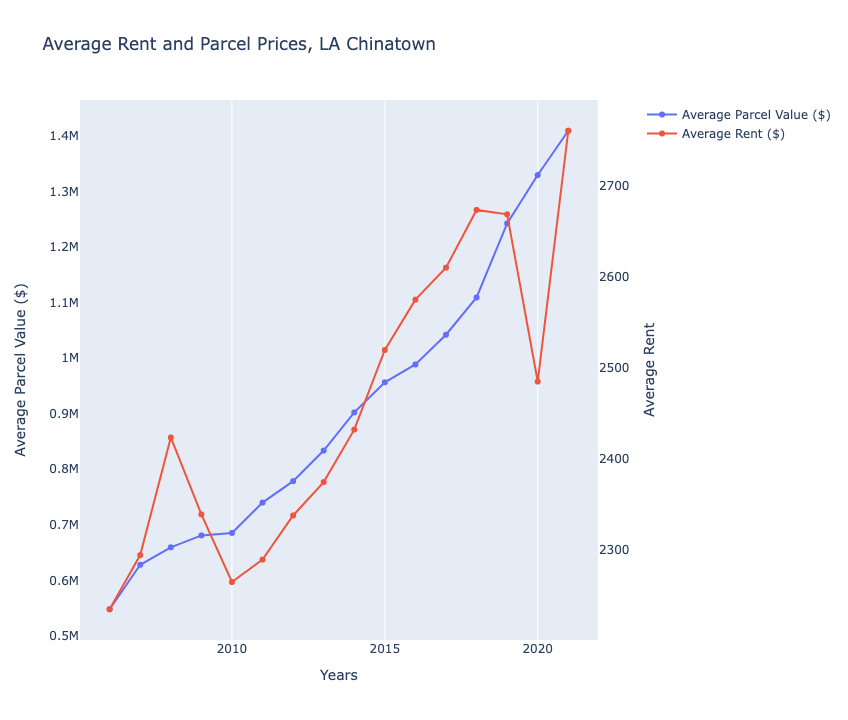

In [60]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=all_avg_data['Year'], y=all_avg_data['TotalValue'], name="Average Parcel Value ($)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=all_avg_data['Year'], y=all_avg_data['Avg_Rent'], name="Average Rent ($)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Average Rent and Parcel Prices, LA Chinatown"
)

# Set x-axis title
fig.update_xaxes(title_text="Years")

# Set y-axes titles
fig.update_yaxes(title_text="Average Parcel Value ($)", secondary_y=False)
fig.update_yaxes(title_text="Average Rent", secondary_y=True)

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=False)

fig.show()